In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#importing data


In [9]:
gdf=gpd.read_file('data/nepal_admin_regions.gpkg')
#display the information
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   name                        7 non-null      object  
 1   climate_vulnerability_2020  7 non-null      float64 
 2   climate_vulnerability_2050  7 non-null      float64 
 3   geometry                    7 non-null      geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 356.0+ bytes


In [33]:
gdf.head()


,name,climate_vulnerability_2020,climate_vulnerability_2050,geometry,vulnerability_change,area
0,Province 1,0.449816,0.656665,"POLYGON ((87 26.5, 88 27, 87.8 28, 87 28.5, 86...",0.206849,1.850
1,Province 2,0.680286,0.939022,"POLYGON ((85 26.5, 87 26.5, 86.5 27.5, 85 27.2...",0.258736,1.525
2,Bagmati,0.592798,0.837280,"POLYGON ((85 27.2, 86.5 27.5, 86.2 28.5, 85 28...",0.244483,1.395
3,Gandaki,0.539463,0.650687,"POLYGON ((83.5 27.5, 85 27.2, 85 28.2, 84 29, ...",0.111224,1.825
4,Lumbini,0.362407,0.540340,"POLYGON ((82 27, 83.5 27.5, 83.5 28, 82.5 28.2...",0.177932,1.150


In [18]:
#display columns in datasets 
print (gdf.columns)

Index(['name', 'climate_vulnerability_2020', 'climate_vulnerability_2050',
       'geometry'],
      dtype='object')


In [17]:
#Check the CRS (Coordinate Reference System) of the data
print (gdf.crs)

EPSG:4326


In [21]:
#check the missing value 
gdf.isnull().sum()

name                          0
climate_vulnerability_2020    0
climate_vulnerability_2050    0
geometry                      0
dtype: int64

In [38]:
#check the discribtion of climate_vulnerability_2020 And	climate_vulnerability_2050
gdf[['climate_vulnerability_2020',	'climate_vulnerability_2050']].describe()



,climate_vulnerability_2020,climate_vulnerability_2050
count,7.000000,7.000000
mean,0.472914,0.651121
std,0.134887,0.184633
min,0.323233,0.408471
25%,0.362403,0.532860
50%,0.449816,0.650687
75%,0.566130,0.746973
max,0.680286,0.939022


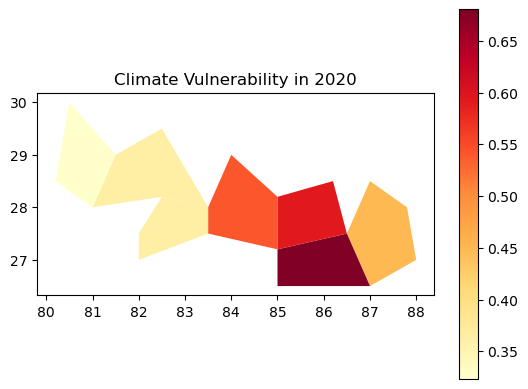

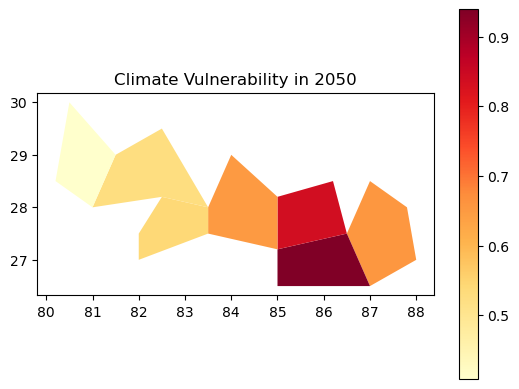

In [37]:
#visualization of climate_vulnerability

# Plot climate vulnerability in 2020
gdf.plot(column='climate_vulnerability_2020', cmap='YlOrRd', legend=True)
plt.title('Climate Vulnerability in 2020')
plt.show()

# Plot climate vulnerability in 2050
gdf.plot(column='climate_vulnerability_2050', cmap='YlOrRd', legend=True)
plt.title('Climate Vulnerability in 2050')
plt.show()

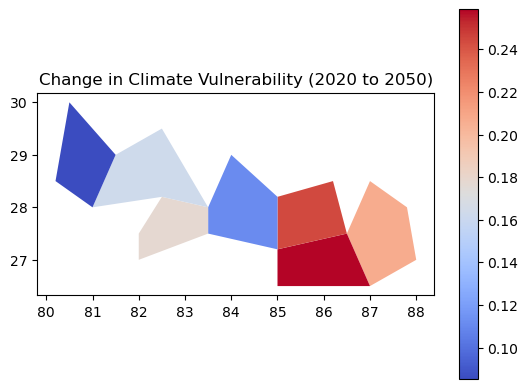

In [27]:
#Compare climate vulnerability between 2020 and 2050

gdf['vulnerability_change'] = gdf['climate_vulnerability_2050'] - gdf['climate_vulnerability_2020']

# Plot the vulnerability change
gdf.plot(column='vulnerability_change', cmap='coolwarm', legend=True)
plt.title('Change in Climate Vulnerability (2020 to 2050)')
plt.show()


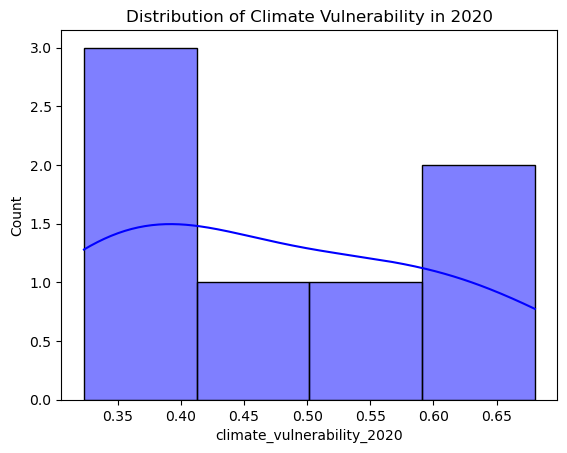

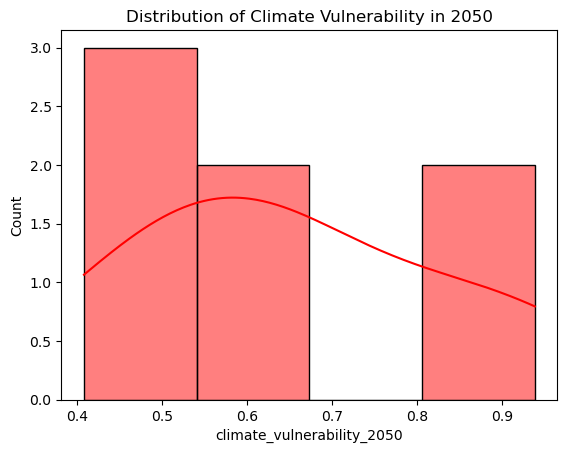

In [28]:

# Plotting the distribution of climate vulnerability values for 2020
sns.histplot(gdf['climate_vulnerability_2020'], kde=True, color='blue')
plt.title('Distribution of Climate Vulnerability in 2020')
plt.show()

#Plotting the distribution of climate vulnerability values for 2050
sns.histplot(gdf['climate_vulnerability_2050'], kde=True, color='red')
plt.title('Distribution of Climate Vulnerability in 2050')
plt.show()


In [31]:
# Calculate the area of each region (in the CRS units, e.g., square degrees or meters depending on CRS)
gdf['area'] = gdf.geometry.area

# Display the area statistics
gdf['area'].head()


C:\Users\Innovative-IT\AppData\Local\Temp\ipykernel_6124\4129738848.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.geometry.area


0    1.850
1    1.525
2    1.395
3    1.825
4    1.150
Name: area, dtype: float64

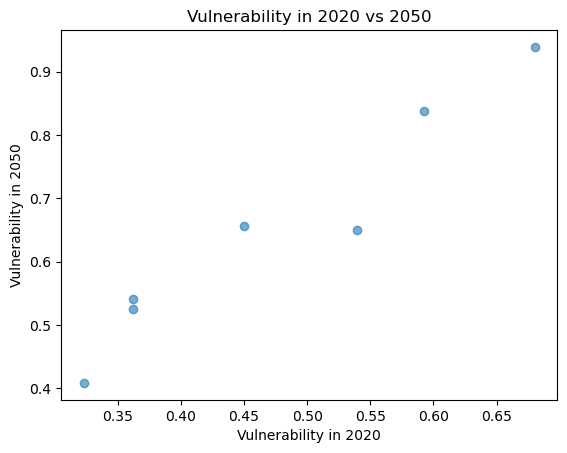

In [41]:
# Scatter plot of vulnerability in 2020 vs 2050
plt.scatter(gdf['climate_vulnerability_2020'], gdf['climate_vulnerability_2050'], alpha=0.6)
plt.title('Vulnerability in 2020 vs 2050')
plt.xlabel('Vulnerability in 2020')
plt.ylabel('Vulnerability in 2050')
plt.show()